In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [3]:
df = pd.read_excel('house_dataset.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


## Visualising and EDA

In [6]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


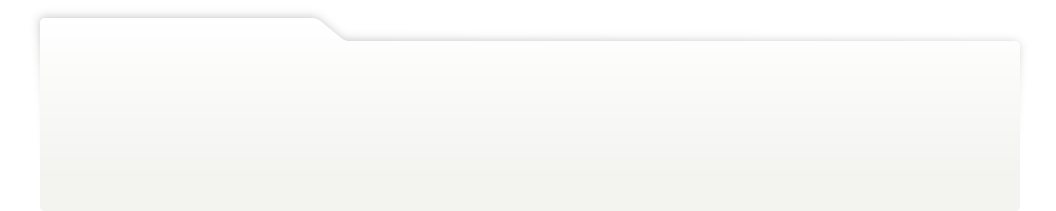
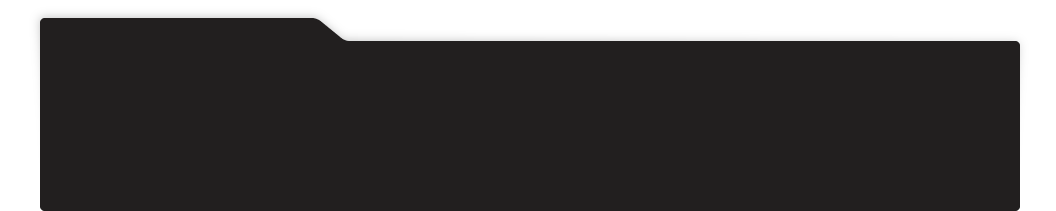
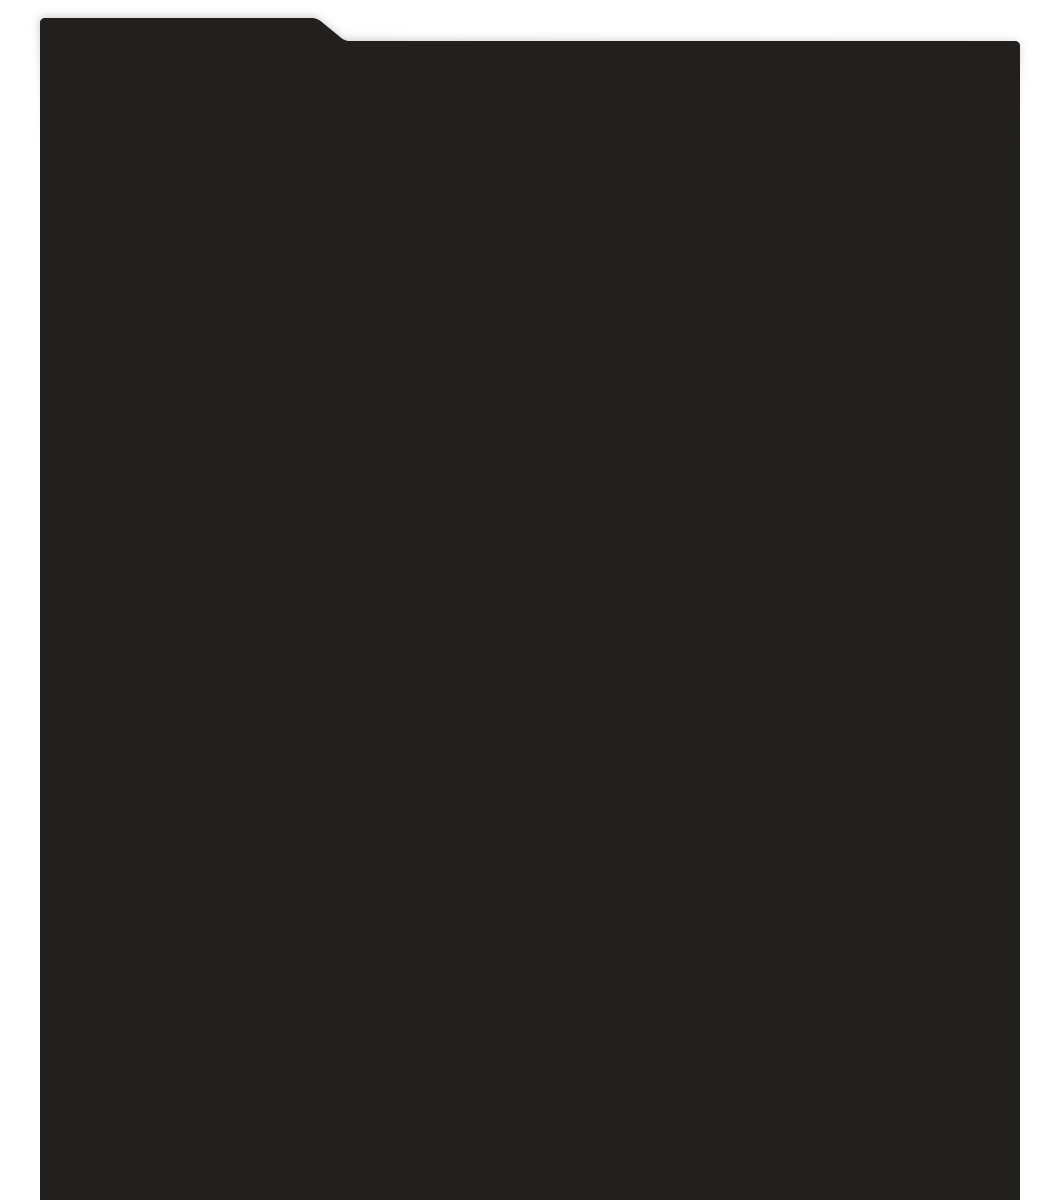
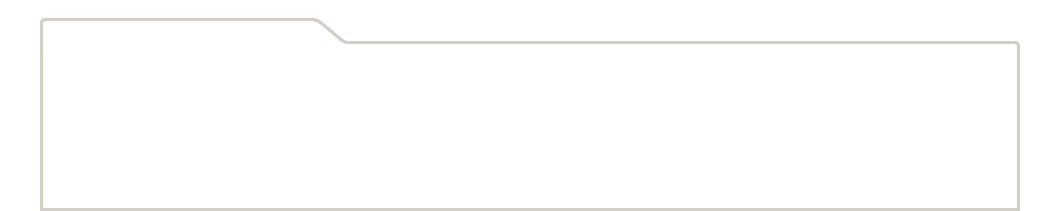
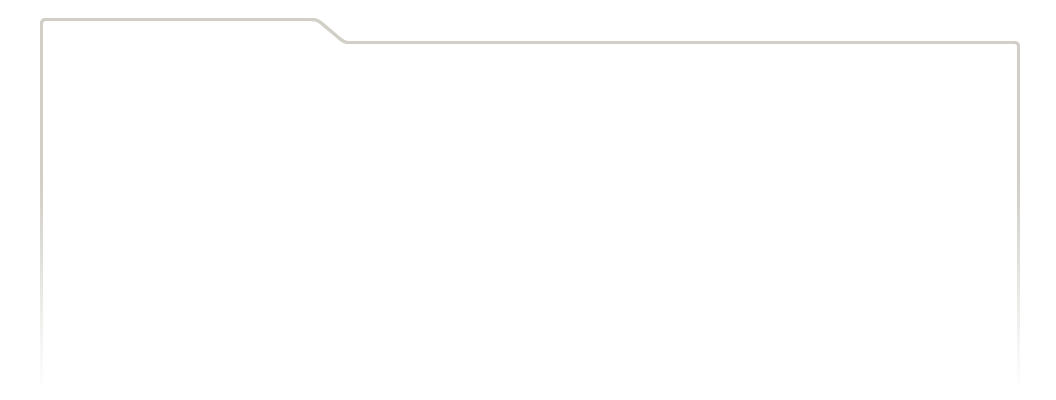
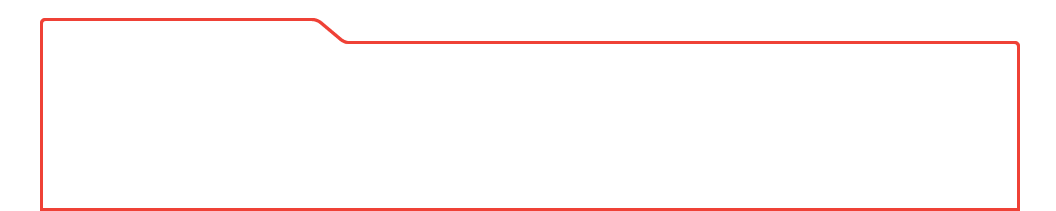
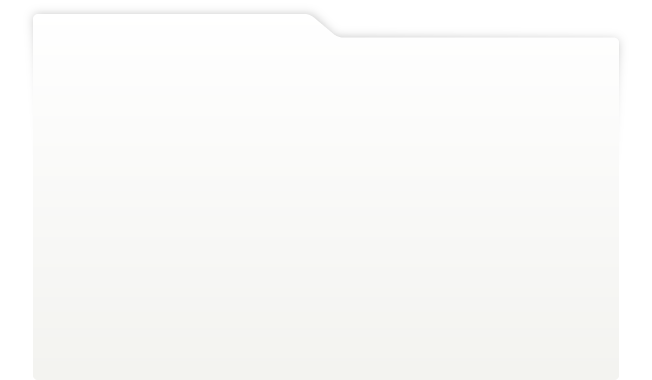
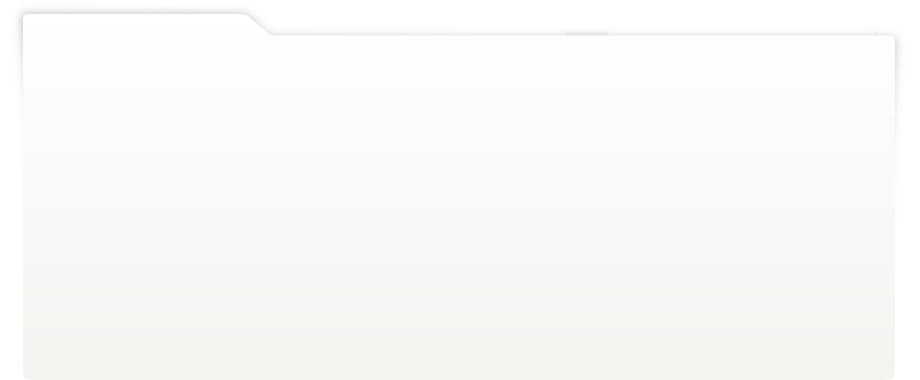
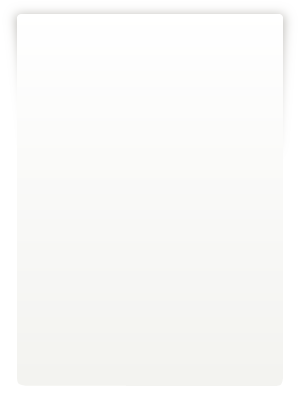
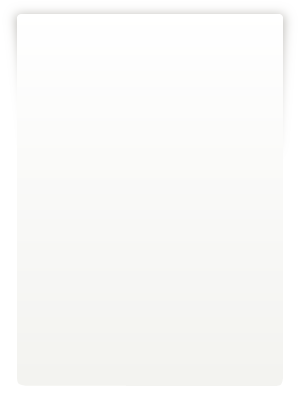
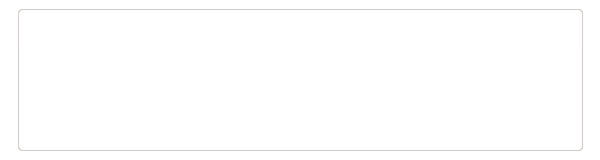
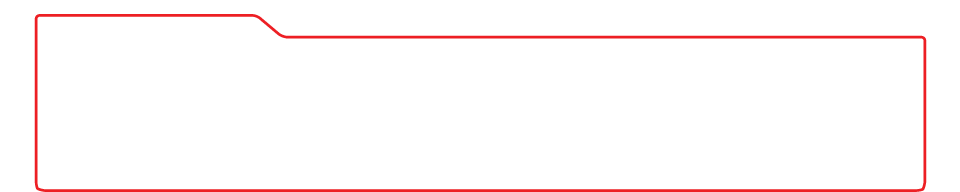
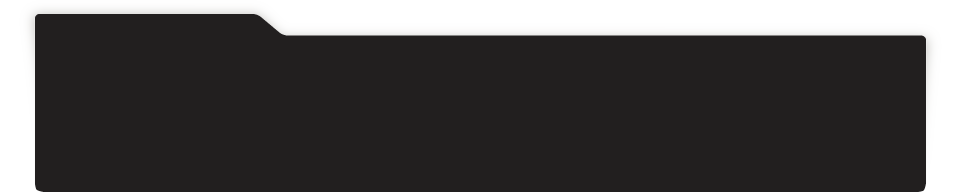
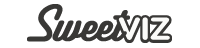
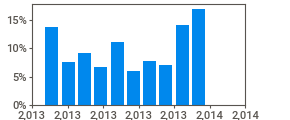
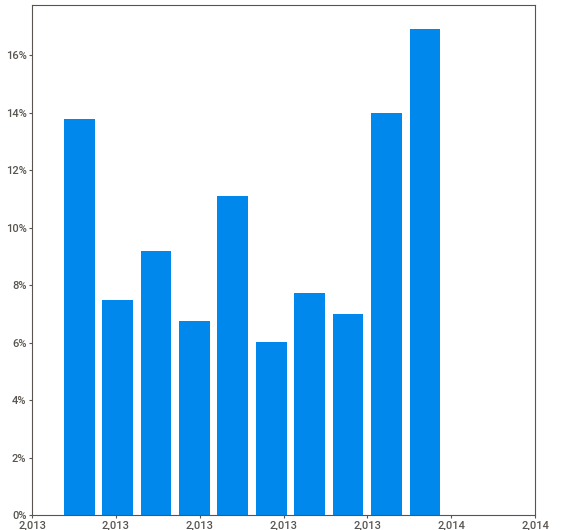
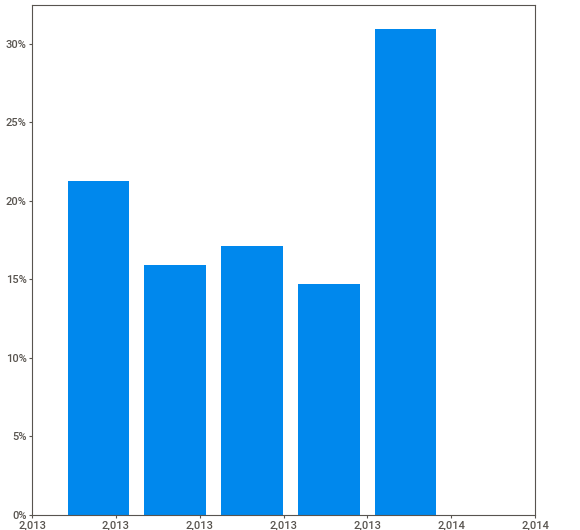
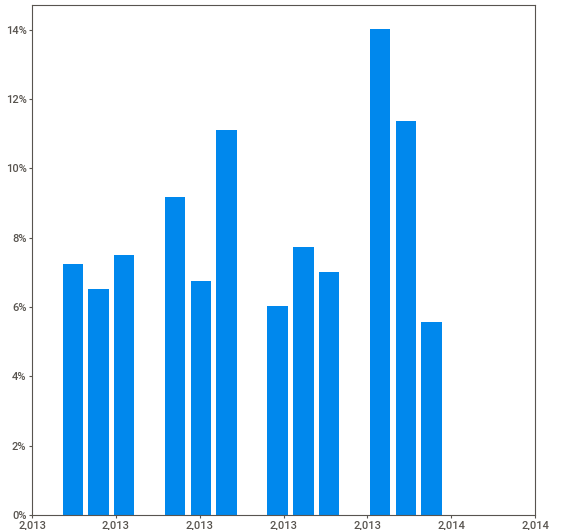
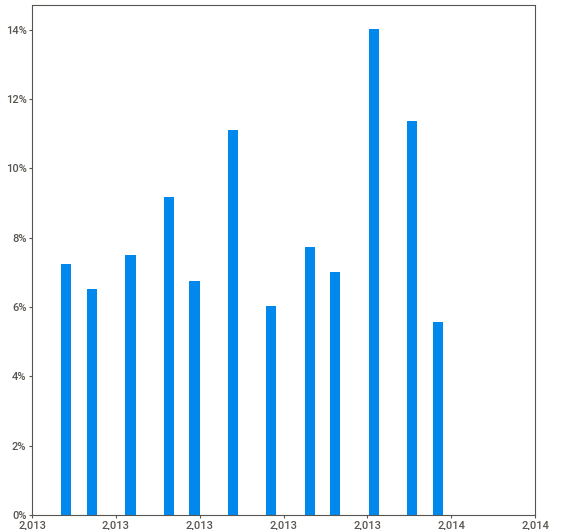
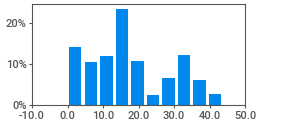
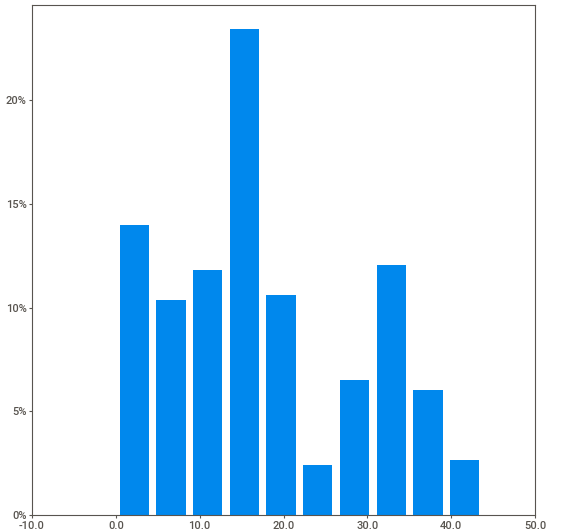
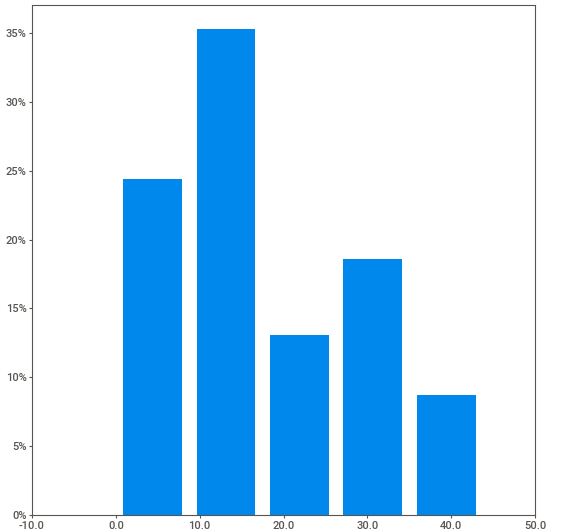
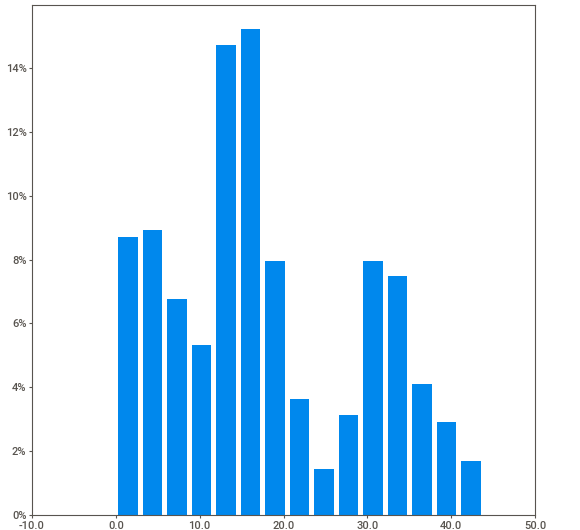
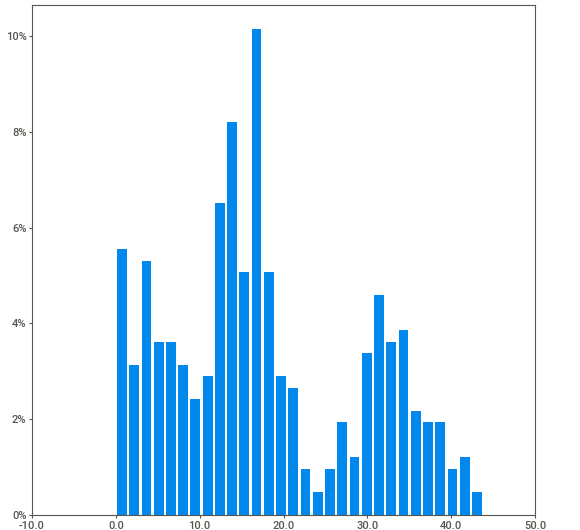
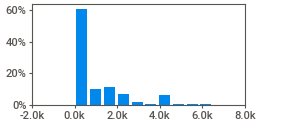
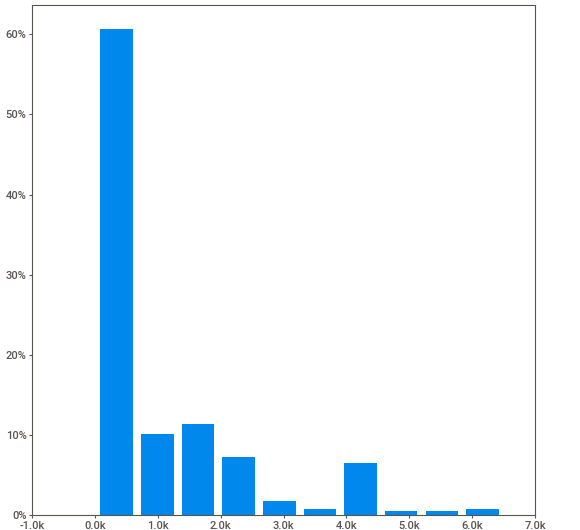
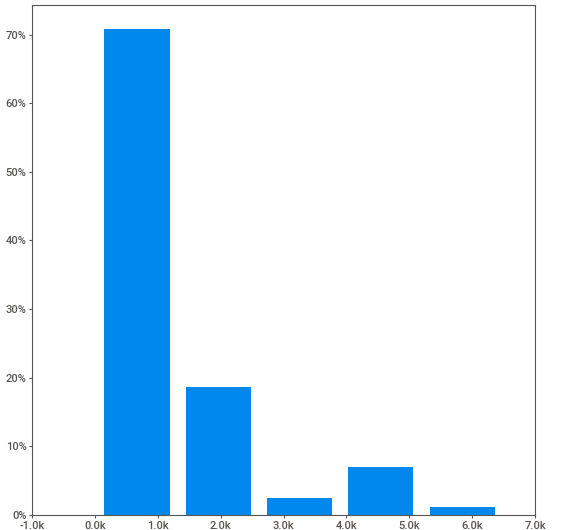
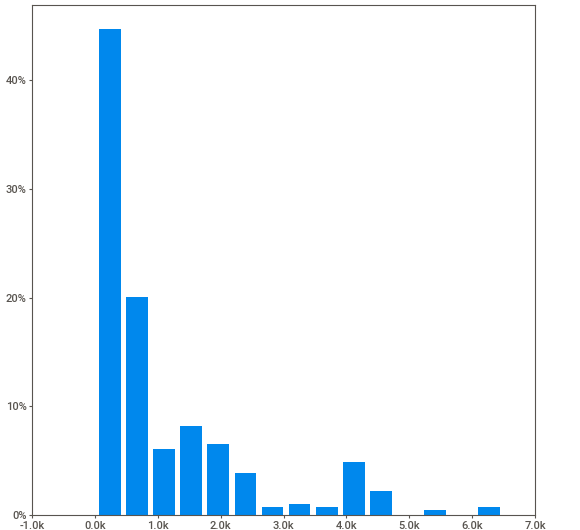
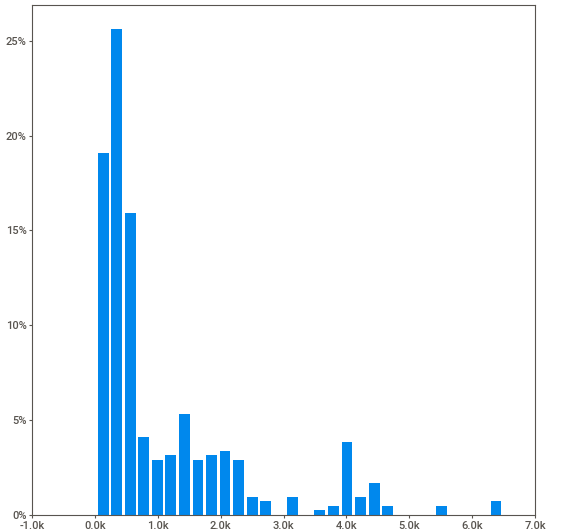
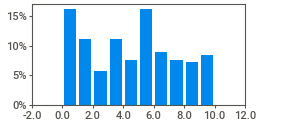
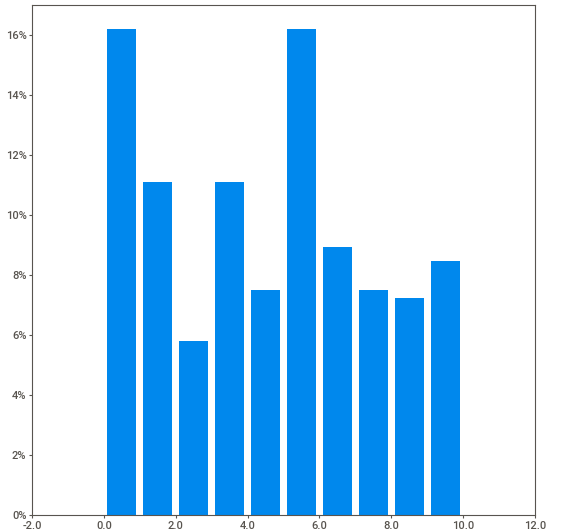
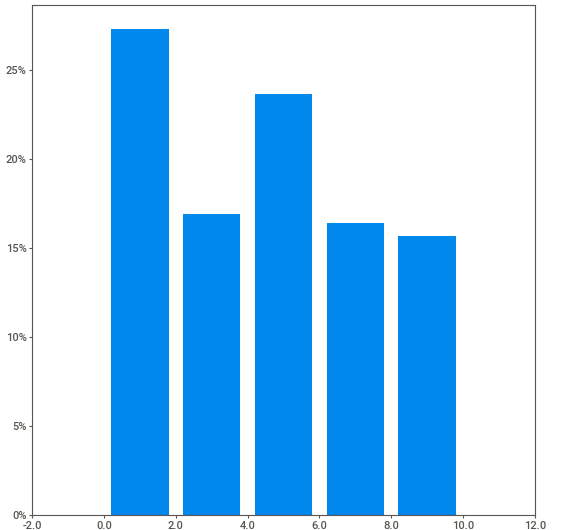
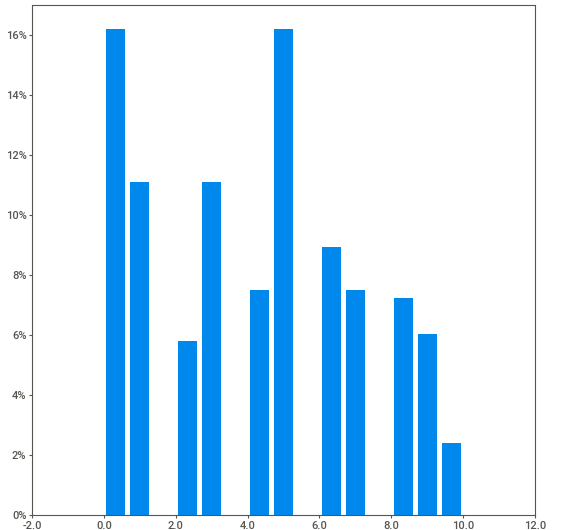
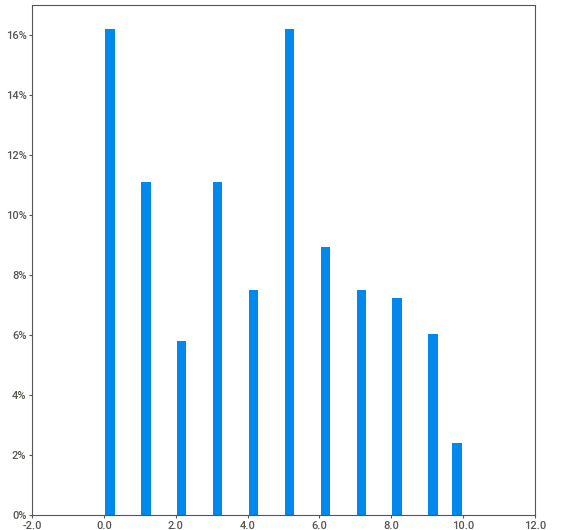
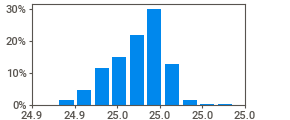
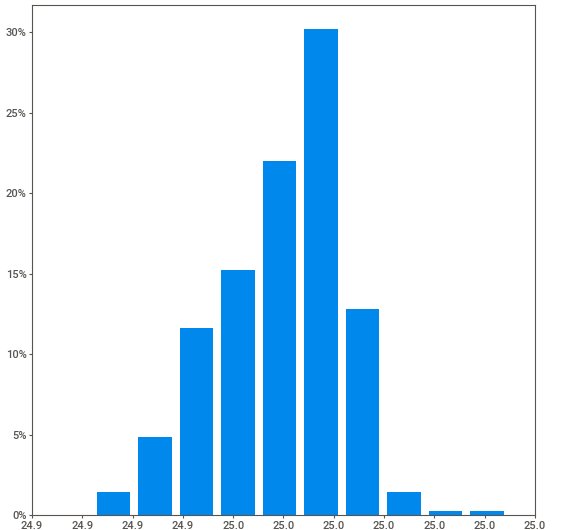
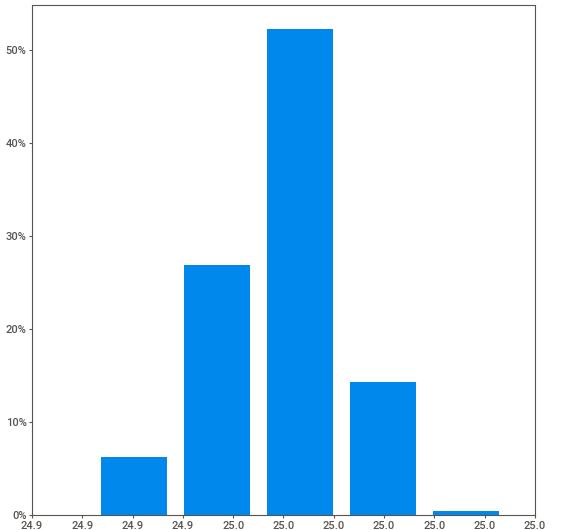
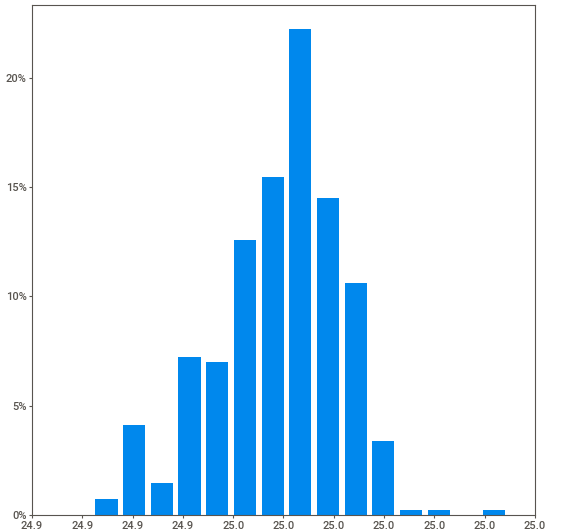
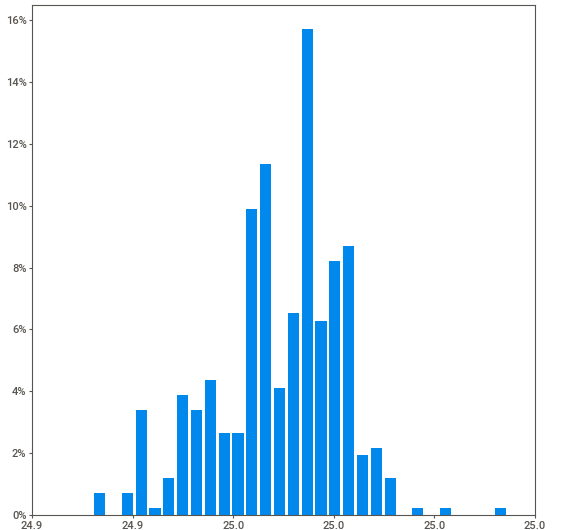
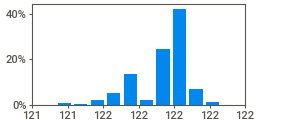
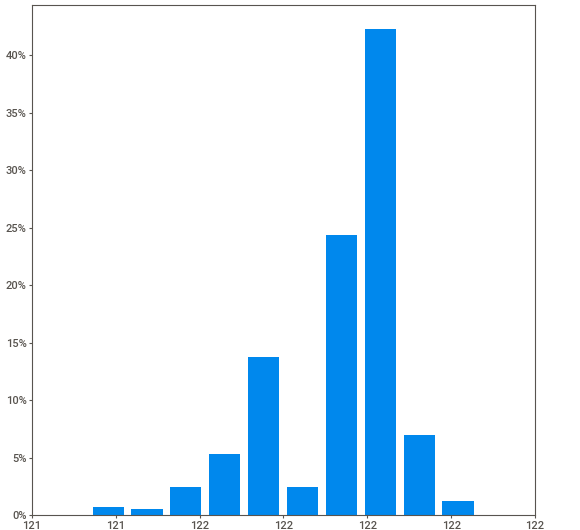
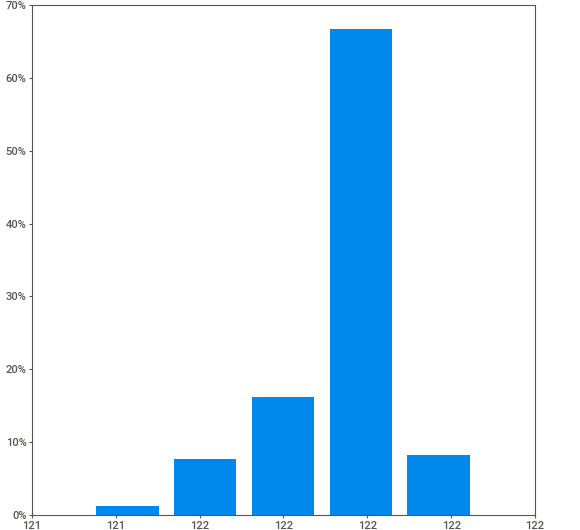
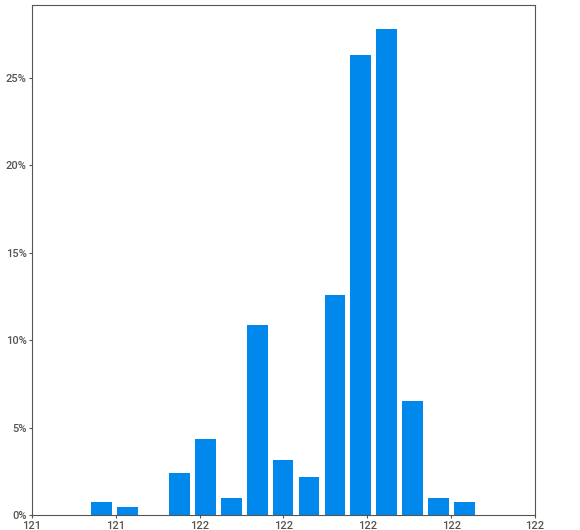
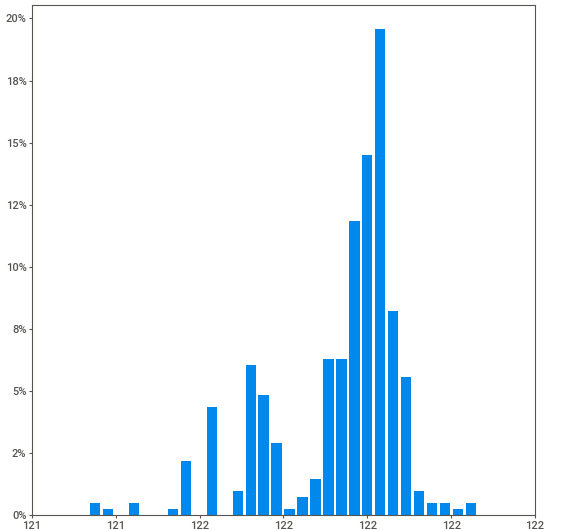
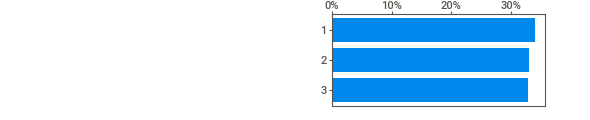
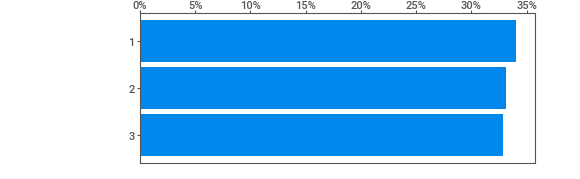
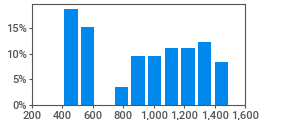
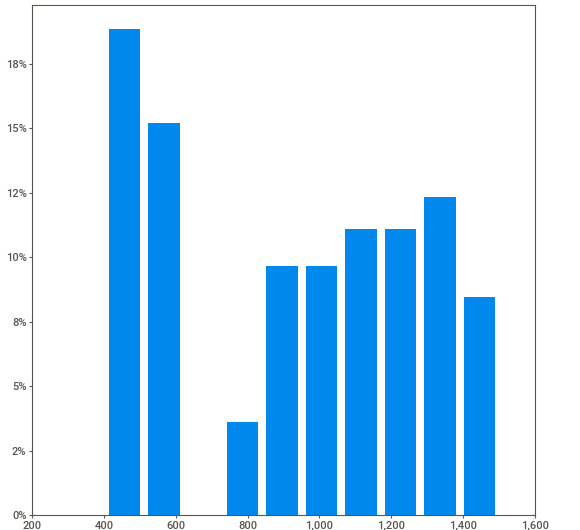
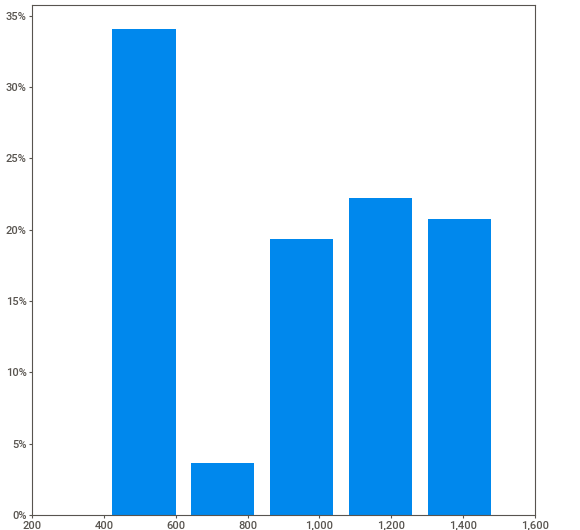
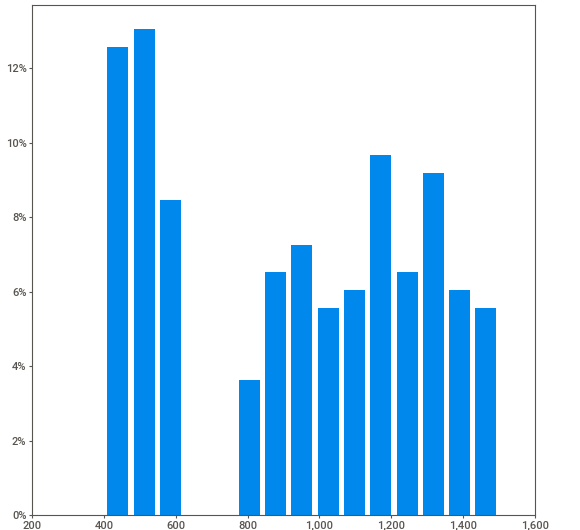
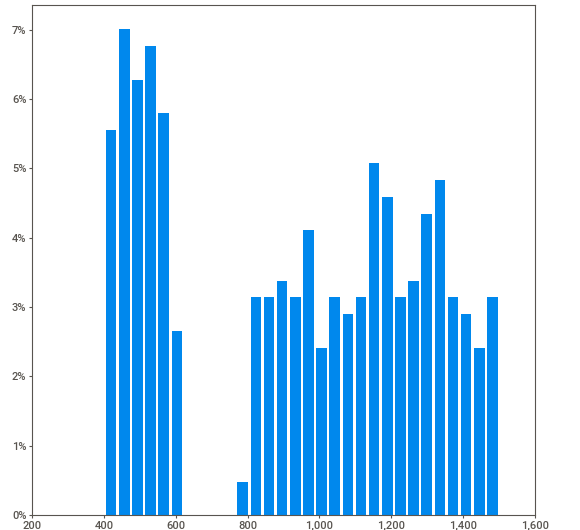
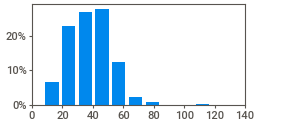
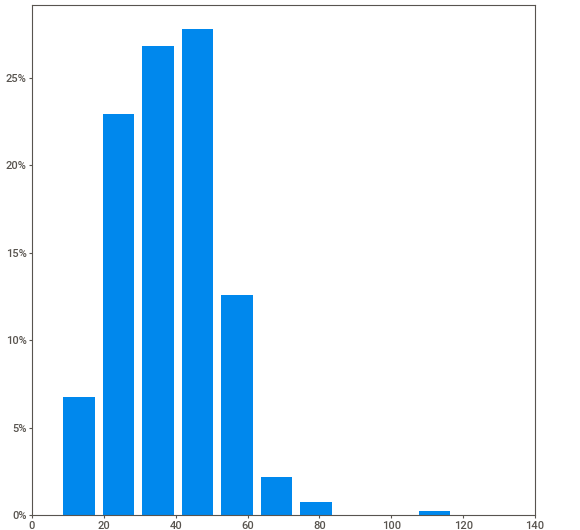
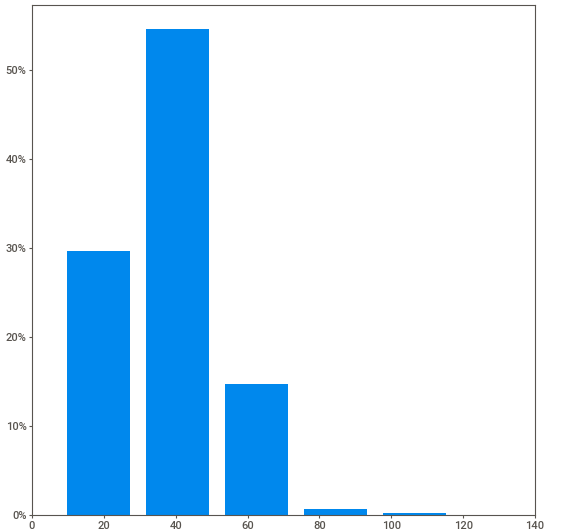
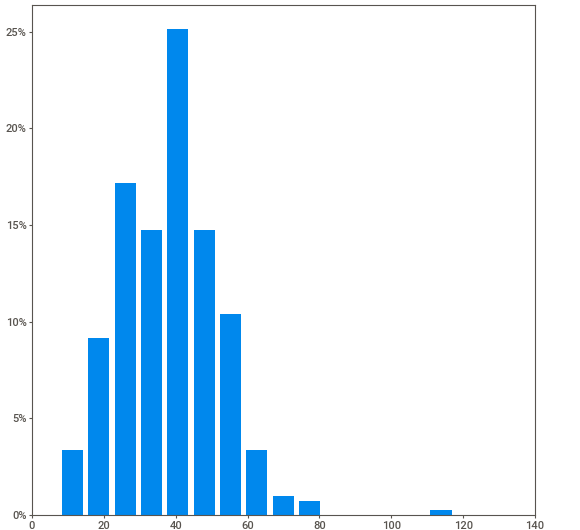
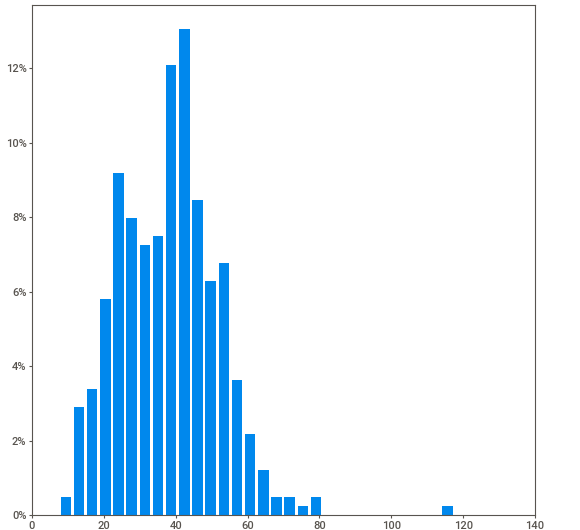
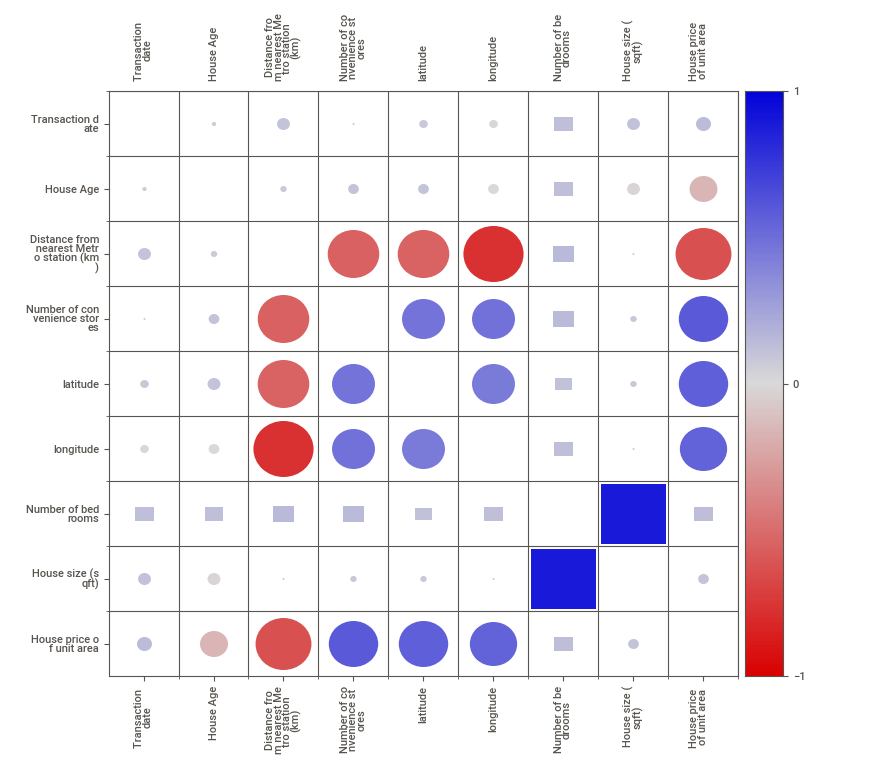
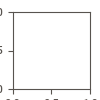

In [7]:
my_report = sv.analyze(df)
my_report.show_notebook(w="100%", h="full") 

In [8]:
from geopy import Nominatim

geolocator = Nominatim(user_agent='geoapiExcercises')

In [9]:
geolocator.reverse("24.98298"+","+"121.54024" ,language='en').raw['address']

{'house_number': '44-2',
 'road': 'Minquan Road',
 'neighbourhood': 'Fuxing Village',
 'suburb': 'Xindian District',
 'village': 'Dapinglin',
 'city': 'New Taipei',
 'ISO3166-2-lvl4': 'TW-NWT',
 'postcode': '23141',
 'country': 'Taiwan',
 'country_code': 'tw'}

In [10]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [11]:
df.drop(['Transaction date'],axis=1, inplace=True)

<AxesSubplot:>

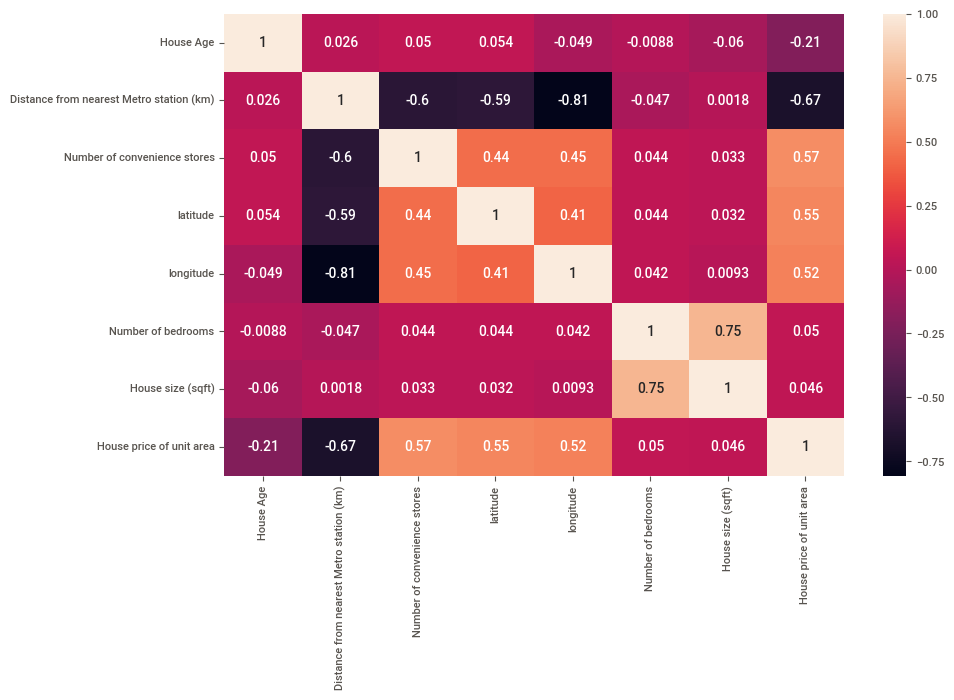

In [12]:
#Find correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## Dataset to Train & Test

In [13]:
#import libraries
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size=0.70, test_size=0.30,random_state=120)

In [14]:
#Dividing X and y sets for model building
y_train = df_train.pop('House price of unit area')
X_train = df_train

In [15]:
#import Linear regression
from sklearn.linear_model import LinearRegression

In [16]:
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
lm.coef_

array([-2.62803034e-01, -4.11927375e-03,  9.84160656e-01,  2.44236022e+02,
       -1.98624111e+00,  2.15974307e-01,  3.69051440e-04])

In [18]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
House Age,-0.262803
Distance from nearest Metro station (km),-0.004119
Number of convenience stores,0.984161
latitude,244.236022
longitude,-1.986241
Number of bedrooms,0.215974
House size (sqft),0.000369


In [19]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     House price of unit area   R-squared (uncentered):                   0.944
Model:                                  OLS   Adj. R-squared (uncentered):              0.942
Method:                       Least Squares   F-statistic:                              675.3
Date:                      Wed, 23 Nov 2022   Prob (F-statistic):                   4.16e-172
Time:                              15:33:24   Log-Likelihood:                         -1063.4
No. Observations:                       289   AIC:                                      2141.
Df Residuals:                           282   BIC:                                      2166.
Df Model:                                 7                                                  
Covariance Type:                  nonrobust                                                  
                                               coef    std e

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.365471e+08
2,Distance from nearest Metro station (km),4.820000e+00
5,longitude,3.510000e+00
7,House size (sqft),2.370000e+00
6,Number of bedrooms,2.350000e+00
4,latitude,1.620000e+00
3,Number of convenience stores,1.560000e+00
1,House Age,1.030000e+00


## Residual Analysis

In [22]:
y_train_price = lm_1.predict(X_train)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_price)

0.5137286171756397

Text(0.5, 0, 'Error')

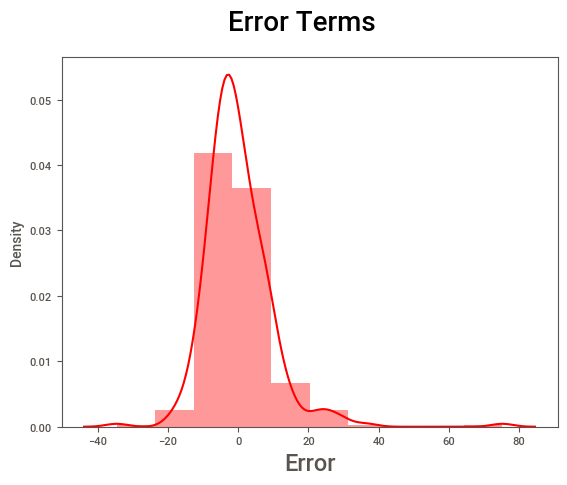

In [27]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=10,color='r')
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

## Prediction

In [29]:
y_test = df_test.pop('House price of unit area')
X_test = df_test

In [30]:
y_test_pred = lm_1.predict(X_test)

In [31]:
#import library
from sklearn.metrics import r2_score

In [32]:
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7082186220217326

In [33]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
111,39.4,42.0
336,35.6,40.0
406,40.5,49.0
34,55.1,49.0
259,28.8,33.0


<AxesSubplot:xlabel='Actual', ylabel='Predictions'>

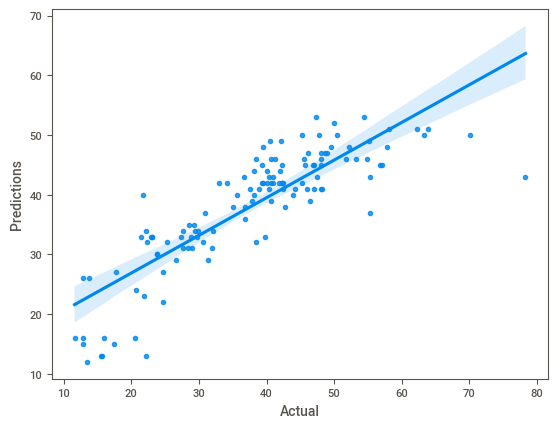

In [34]:
sns.regplot('Actual','Predictions',data=df)

In [35]:
from sklearn import metrics

#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))
#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE 5.261199652671924
MSE 50.91186617082012
RMSE 7.135255158073894


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_r = RandomForestRegressor()
model_r.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_r = model_r.predict(X_test)

In [41]:
r2_score(y_test,y_r)*100

75.38235044705242

### We will Use Random Forest Model as it has higer acuracy than Linear regression,
### (I've conducted lasso and ridge regression also but has lower accuracy)